Weather Analysis - Observed Trends:

- Cities closest to the equater have higher maximum temperatures. Cities farther away from the equator have lower maximum temperatures.
- Humidity increases as latitude approaches the equator.
- Cloudiness decreases as latitude approaches the equator.
- The majority of cities in the data set have wind speeds from 0 - 20mph; speeds appear to decrease as latitude approaches the equator. 




In [3]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from citipy import citipy

#api_key
from config import api_key

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = "%sappid=%s&units=%s&q="%(url, api_key, units)
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q='

In [5]:
#find random coordinates
lats = np.random.randint(0,91, size=(2000)) #northern hemisphere values only
lngs = np.random.randint(-180,181, size=(2000))

In [6]:
#zip coordinates 
coordinates = list(zip(lats, lngs))
coordinates

[(4, -143),
 (11, 40),
 (61, 126),
 (25, 163),
 (60, 96),
 (45, -143),
 (11, -62),
 (86, 26),
 (84, 165),
 (13, 25),
 (68, -68),
 (6, 35),
 (9, 141),
 (34, 103),
 (9, -82),
 (50, 169),
 (9, -110),
 (16, -40),
 (8, -52),
 (32, -98),
 (5, -73),
 (62, -154),
 (54, -61),
 (29, 41),
 (48, 49),
 (28, -29),
 (20, 10),
 (16, 15),
 (68, -45),
 (90, -92),
 (52, 122),
 (77, -122),
 (54, 44),
 (15, -104),
 (3, 12),
 (32, -157),
 (55, -126),
 (25, -61),
 (55, 82),
 (6, -134),
 (65, -141),
 (61, 82),
 (8, -136),
 (86, -8),
 (46, -156),
 (78, -103),
 (52, -114),
 (71, -147),
 (67, 149),
 (64, 56),
 (10, -40),
 (46, 114),
 (78, -86),
 (56, -115),
 (24, -107),
 (72, -51),
 (43, -103),
 (82, 33),
 (48, -96),
 (69, 64),
 (84, 120),
 (57, 61),
 (21, 43),
 (6, 147),
 (88, 79),
 (14, 36),
 (7, -142),
 (87, -112),
 (80, -105),
 (6, 159),
 (35, 160),
 (84, 113),
 (34, 64),
 (42, -20),
 (26, -14),
 (77, 10),
 (10, 9),
 (84, 103),
 (46, -22),
 (58, 123),
 (26, -60),
 (24, -121),
 (0, -8),
 (28, -174),
 (79, 149

In [7]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

In [8]:
names = []
codes = []

for city in cities:
    country_code = city.country_code
    codes.append(country_code)
    
    name = city.city_name
    names.append(name)

In [9]:
len(names)

2000

In [10]:
#zip cities 
zip_cities = list(zip(names, codes))
len(zip_cities)

2000

In [11]:
unique_names = []

for zip_city in zip_cities:
    if zip_city not in unique_names:
        unique_names.append(zip_city)


In [12]:
len(unique_names)

887

In [18]:
unique_df = pd.DataFrame(unique_names, columns=['City Name', 'Country Code'])
unique_df["Latitude"] = ""
unique_df["Longitude"] = ""
unique_df["Temperature (F)"] = ""
unique_df["Humidity"] = ""
unique_df["Cloudiness"] = ""
unique_df["Wind Speed"] = ""
unique_df["Date"] = ""
unique_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed,Date
0,atuona,pf,,,,,,,
1,bati,et,,,,,,,
2,berdigestyakh,ru,,,,,,,
3,butaritari,ki,,,,,,,
4,baykit,ru,,,,,,,


In [60]:
len(unique_names)

887

In [61]:

# Loop through the list of cities and perform a request for data on each
for index, unique_name in enumerate(unique_names):
    name, code = unique_name
    response = requests.get(query_url + name, code).json()
    #print(json.dumps(response, indent=4, sort_keys=True))
    try:
        temp = (response['main']['temp_max'])
        humidity = (response['main']['humidity'])
        clouds = (response['clouds']['all'])
        wind = (response['wind']['speed'])
        latitude = (response['coord']['lat'])
        longitude = (response['coord']['lon'])
        date = (response['dt']) 
            
        print(query_url + name + code)
        print(f"Retrieving Results for City #" + str(index) + ": " + str(name).title() + "," + str(code).upper())
    
        unique_df.set_value(index, "Latitude", latitude)
        unique_df.set_value(index, "Longitude", longitude)
        unique_df.set_value(index, "Temperature (F)", temp)
        unique_df.set_value(index, "Humidity", humidity)
        unique_df.set_value(index, "Cloudiness", clouds)
        unique_df.set_value(index, "Wind Speed", wind)
        unique_df.set_value(index, "Date", date)
    
    except(KeyError, IndexError):
        print(f"Error Retrieving Results for City #" + str(index) + ": " + str(name).title() + ", " + str(code).upper() + "." + " Skipping record.")
        continue    
    
print(f"------------------------")        
print(f"Data Retrieval Complete.")        
print(f"------------------------")

unique_df.head()

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=atuonapf
Retrieving Results for City #0: Atuona,PF
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=batiet
Retrieving Results for City #1: Bati,ET
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=berdigestyakhru
Retrieving Results for City #2: Berdigestyakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=butaritariki
Retrieving Results for City #3: Butaritari,KI
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=baykitru
Retrieving Results for City #4: Baykit,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=sitkaus
Retrieving Results for City #5: Sitka,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=vardono
Retrieving Results for City #53: Vardo,NO
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=grand forksus
Retrieving Results for City #54: Grand Forks,US
Error Retrieving Results for City #55: Severnyy, RU. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=saskylakhru
Retrieving Results for City #56: Saskylakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=staropyshminskru
Retrieving Results for City #57: Staropyshminsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=abhasa
Retrieving Results for City #58: Abha,SA
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=lorengaupg
Retrieving Resu

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=bethelus
Retrieving Results for City #112: Bethel,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=polesskru
Retrieving Results for City #113: Polessk,RU
Error Retrieving Results for City #114: Andenes, NO. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=evreuxfr
Retrieving Results for City #115: Evreux,FR
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=palmerus
Retrieving Results for City #116: Palmer,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=cherskiyru
Retrieving Results for City #117: Cherskiy,RU
Error Retrieving Results for City #118: Kuche, CN. Skipping record.
Error Retrieving Results for City #119: Ondorhaan, MN. Skipping record.
http

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=fairbanksus
Retrieving Results for City #168: Fairbanks,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=minbumm
Retrieving Results for City #169: Minbu,MM
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=hansiin
Retrieving Results for City #170: Hansi,IN
Error Retrieving Results for City #171: Mys Shmidta, RU. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=provideniyaru
Retrieving Results for City #172: Provideniya,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=georgetowngy
Retrieving Results for City #173: Georgetown,GY
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=rio blanconi
Retrieving

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kunyaru
Retrieving Results for City #223: Kunya,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=sohageg
Retrieving Results for City #224: Sohag,EG
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=gondaret
Retrieving Results for City #225: Gondar,ET
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=lavrentiyaru
Retrieving Results for City #226: Lavrentiya,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=toora-khemru
Retrieving Results for City #227: Toora-Khem,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kautokeinono
Retrieving Results for City #228: Kautokeino,NO
Error Retrieving Results for City #229: Yana

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=duminichiru
Retrieving Results for City #278: Duminichi,RU
Error Retrieving Results for City #279: Cuyo, PH. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=wanxiancn
Retrieving Results for City #280: Wanxian,CN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=chifengcn
Retrieving Results for City #281: Chifeng,CN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=bar harborus
Retrieving Results for City #282: Bar Harbor,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=danilovkaru
Retrieving Results for City #283: Danilovka,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=mataralk
Retrieving Result

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=morant bayjm
Retrieving Results for City #331: Morant Bay,JM
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=chumikanru
Retrieving Results for City #332: Chumikan,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=talastr
Retrieving Results for City #333: Talas,TR
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kerouanegn
Retrieving Results for City #334: Kerouane,GN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=puerto del rosarioes
Retrieving Results for City #335: Puerto Del Rosario,ES
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=saskatoonca
Retrieving Results for City #336: Saskatoon,CA
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=anadyrru
Retrieving Results for City #386: Anadyr,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=puerto leguizamoco
Retrieving Results for City #387: Puerto Leguizamo,CO
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=fairviewca
Retrieving Results for City #388: Fairview,CA
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=lasacn
Retrieving Results for City #389: Lasa,CN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kuala terengganumy
Retrieving Results for City #390: Kuala Terengganu,MY
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=lixouriongr
Retrieving Results for City #391: Lixourion,GR
Error Retrieving R

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=hobyoso
Retrieving Results for City #440: Hobyo,SO
Error Retrieving Results for City #441: Azimur, MA. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=gornopravdinskru
Retrieving Results for City #442: Gornopravdinsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=caramayph
Retrieving Results for City #443: Caramay,PH
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=alpenaus
Retrieving Results for City #444: Alpena,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=tazovskiyru
Retrieving Results for City #445: Tazovskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=zabaykalskru
Retrieving Re

Error Retrieving Results for City #496: Acarau, BR. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=ust-koksaru
Retrieving Results for City #497: Ust-Koksa,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=los llanos de aridanees
Retrieving Results for City #498: Los Llanos De Aridane,ES
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=rivertonus
Retrieving Results for City #499: Riverton,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=tourlavillefr
Retrieving Results for City #500: Tourlaville,FR
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=sept-ilesca
Retrieving Results for City #501: Sept-Iles,CA
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imp

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=armanru
Retrieving Results for City #550: Arman,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=jeremieht
Retrieving Results for City #551: Jeremie,HT
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=tigilru
Retrieving Results for City #552: Tigil,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=jaleswarin
Retrieving Results for City #553: Jaleswar,IN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=petropavlovsk-kamchatskiyru
Retrieving Results for City #554: Petropavlovsk-Kamchatskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=riyadhsa
Retrieving Results for City #555: Riyadh,SA
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=haines junctionca
Retrieving Results for City #606: Haines Junction,CA
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=severo-yeniseyskiyru
Retrieving Results for City #607: Severo-Yeniseyskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=libengecd
Retrieving Results for City #608: Libenge,CD
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=san jeronimomx
Retrieving Results for City #609: San Jeronimo,MX
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=talayaru
Retrieving Results for City #610: Talaya,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=umm kaddadahsd
Retrieving Results for City #611: Umm Kaddadah

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=alamosmx
Retrieving Results for City #660: Alamos,MX
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=nnewing
Retrieving Results for City #661: Nnewi,NG
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=tazmaltdz
Retrieving Results for City #662: Tazmalt,DZ
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=coriaes
Retrieving Results for City #663: Coria,ES
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=warrenus
Retrieving Results for City #664: Warren,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kaunaslt
Retrieving Results for City #665: Kaunas,LT
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=hamicn
Retrieving Results for City #715: Hami,CN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=mason cityus
Retrieving Results for City #716: Mason City,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kuluin
Retrieving Results for City #717: Kulu,IN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=marsh harbourbs
Retrieving Results for City #718: Marsh Harbour,BS
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=vyshestebliyevskayaru
Retrieving Results for City #719: Vyshestebliyevskaya,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=saint andrewsca
Retrieving Results for City #720: Saint Andrews,CA
Error Retr

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=clearwaterus
Retrieving Results for City #769: Clearwater,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=vicksburgus
Retrieving Results for City #770: Vicksburg,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=rorvikno
Retrieving Results for City #771: Rorvik,NO
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=watrousca
Retrieving Results for City #772: Watrous,CA
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=araouaneml
Retrieving Results for City #773: Araouane,ML
Error Retrieving Results for City #774: Bocaranga, CF. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=villacarrilloes
Retrievin

http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=sosnovo-ozerskoyeru
Retrieving Results for City #824: Sosnovo-Ozerskoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=hezecn
Retrieving Results for City #825: Heze,CN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=dengzhoucn
Retrieving Results for City #826: Dengzhou,CN
Error Retrieving Results for City #827: Kyra, RU. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=tongrencn
Retrieving Results for City #828: Tongren,CN
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=dillonus
Retrieving Results for City #829: Dillon,US
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=sovetskiyru
Retrieving Res

Error Retrieving Results for City #879: Kalavrita, GR. Skipping record.
Error Retrieving Results for City #880: Geresk, AF. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kayesml
Retrieving Results for City #881: Kayes,ML
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=kazerunir
Retrieving Results for City #882: Kazerun,IR
Error Retrieving Results for City #883: Tawkar, SD. Skipping record.
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=batticaloalk
Retrieving Results for City #884: Batticaloa,LK
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=agnibilekrouci
Retrieving Results for City #885: Agnibilekrou,CI
http://api.openweathermap.org/data/2.5/weather?appid=ecfa6a1cf2efc42a372f2e0aec64ad56&units=Imperial&q=partizanskoyeru
Retrieving Results for City

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed,Date
0,atuona,pf,-9.80,-139.03,79.78,100.0,80.0,13.91,1.521043e+09
1,bati,et,11.19,40.02,74.83,82.0,68.0,2.39,1.521043e+09
2,berdigestyakh,ru,62.10,126.70,-7.70,61.0,44.0,4.63,1.521043e+09
3,butaritari,ki,3.07,172.79,82.30,100.0,56.0,10.78,1.521043e+09
4,baykit,ru,61.68,96.39,3.10,80.0,56.0,5.41,1.521043e+09


In [62]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
City Name          887 non-null object
Country Code       887 non-null object
Latitude           795 non-null float64
Longitude          795 non-null float64
Temperature (F)    795 non-null float64
Humidity           795 non-null float64
Cloudiness         795 non-null float64
Wind Speed         795 non-null float64
Date               795 non-null float64
dtypes: float64(7), object(2)
memory usage: 62.4+ KB


In [84]:
unique_df = unique_df.dropna(how='any')

In [86]:
unique_df.count()

City Name          795
Country Code       795
Latitude           795
Longitude          795
Temperature (F)    795
Humidity           795
Cloudiness         795
Wind Speed         795
Date               795
dtype: int64

In [87]:
unique_df.to_csv("unique_cities_lat_longs.csv",
                     encoding="utf-8", index=False)

In [37]:
#unique_df[['Latitude','Longitude','Temperature (F)','Humidity','Cloudiness','Wind Speed','Date']] = unique_df[['Latitude','Longitude','Temperature (F)','Humidity','Cloudiness','Wind Speed','Date']].apply(pd.to_numeric)                                    

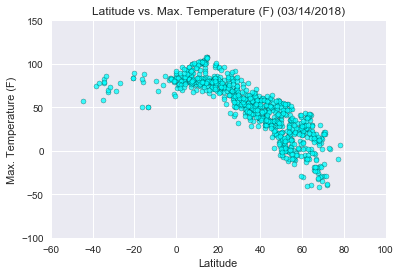

In [144]:
plt.scatter(x='Latitude', y='Temperature (F)', c="cyan", alpha=0.75, edgecolor="black", s=25, data=unique_df)  

plt.title("Latitude vs. Max. Temperature (F) (03/14/2018)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
    
plt.ylim(-100, 150)
plt.xlim(-60, 100)

plt.savefig("Latitude_MaxTemp.png", dpi=150)

plt.show()

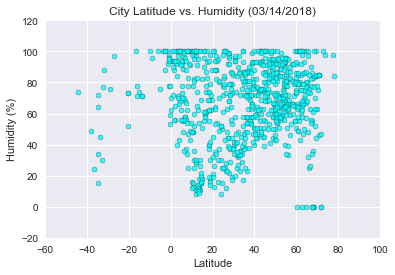

In [145]:
plt.scatter(x='Latitude', y='Humidity', c="cyan", alpha=0.75, edgecolor="black", s=25, data=unique_df)  
          
plt.title("City Latitude vs. Humidity (03/14/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
    
plt.ylim(-20, 120)
plt.xlim(-60, 100)

plt.savefig("Latitude_Humidity.png", dpi=150)

plt.show()

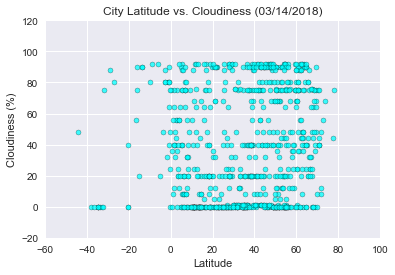

In [146]:
plt.scatter(x='Latitude', y='Cloudiness', c="cyan", alpha=0.75, edgecolor="black", s=25, data=unique_df)  
          
plt.title("City Latitude vs. Cloudiness (03/14/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
    
plt.ylim(-20, 120)
plt.xlim(-60, 100)

plt.savefig("Latitude_Cloudiness.png", dpi=150)

plt.show()

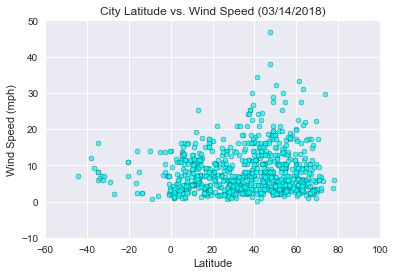

In [147]:
plt.scatter(x='Latitude', y='Wind Speed', c="cyan", alpha=0.75, edgecolor="black", s=25, data=unique_df)  
          
plt.title("City Latitude vs. Wind Speed (03/14/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
    
plt.ylim(-10, 50)
plt.xlim(-60, 100)

plt.savefig("Wind_Speed.png", dpi=150)

plt.show()